In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Up till now, I've been able to manipulate with the original Excel sheets without using Excel to correct or move anything. 
# However, the incorrect values (namely, -Ä followed by some number) are read into Python as missing values. Therefore, I will fix these values in Excel and then proceed to solve exercise 4 in Python.

In [2]:
xls = pd.ExcelFile('Excel_Test_(2).xlsx')

In [3]:
#xls.sheet_names

In [4]:
df1 = xls.parse("SUPPORT>>>", skiprows = 1)
df2 = xls.parse("Country Codes")

In [5]:
country_codes = dict(zip(df2["Country Code"], df2["Country"]))
df1.Country = df1.Country.fillna(value = "(Missing)")
df1.Country = df1.Country.apply(lambda x : x.upper())
df1.Country = df1['Country'].map(country_codes).fillna(df1['Country'])

In [6]:
df1["Sale Date"] = df1["Sale Date"].astype(str)

def sale_dates(df1):
    if df1["Sale Date"] == "2019-10-17":
        return "Sale Day"
    if df1["Sale Date"] == "2019-10-18":
        return "Sale Day"
    if df1["Sale Date"] == "2019-10-19":
        return "Sale Day"
    if df1["Sale Date"] == "2019-10-20":
        return "Sale Day"
    return "Not Sale Day"

df1["Was_Sale_Day"] = df1.apply(sale_dates, axis = 1)

# Exercise 4.1 Answer

In [7]:
table = pd.pivot_table(df1, 
               index = ["Game","Platform"], 
               values = "Corrected Revenue (Euro)", 
               aggfunc = np.sum)

table['Corrected Revenue (Euro)'] = table["Corrected Revenue (Euro)"] // 1

table['% per Game'] = ((table["Corrected Revenue (Euro)"] / \
                       table.groupby(level=0)["Corrected Revenue (Euro)"].transform(sum) * 100)//1).astype(str) + '%'

table['% of Total'] = ((table["Corrected Revenue (Euro)"] / \
                       table["Corrected Revenue (Euro)"].sum() * 100)//1).astype(str) + '%'

print("All percents are rounded down")
table

All percents are rounded down


Corrected Revenue (Euro) % per Game  \
Game                    Platform                                        
Game 1                  PC                          3158.0      38.0%   
                        PS4                         3778.0      46.0%   
                        XONE                        1228.0      15.0%   
Game 1 - Deluxe Edition PC                         16301.0      48.0%   
                        PS4                         5546.0      16.0%   
                        Switch                     10337.0      30.0%   
                        XONE                        1501.0       4.0%   

                                 % of Total  
Game                    Platform             
Game 1                  PC             7.0%  
                        PS4            9.0%  
                        XONE           2.0%  
Game 1 - Deluxe Edition PC            38.0%  
                        PS4           13.0%  
                        Switch        24.0%  
                        XONE           3.0%

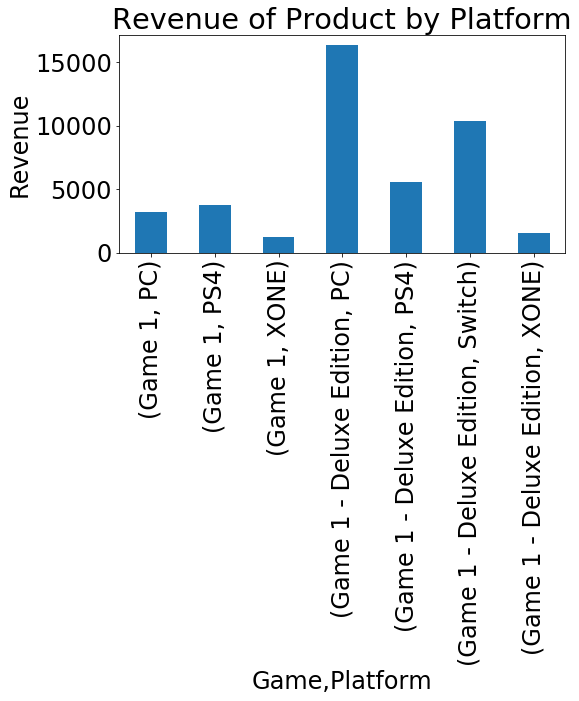

In [8]:
# For Aesthetics
font = {'size' : 24}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (8.0, 4.0) ### (→ , ↑) ###

ax = table.plot(kind="bar")
plt.ylabel("Revenue")
plt.title("Revenue of Product by Platform")
ax.get_legend().remove()
plt.show()

In [9]:
table2 = pd.pivot_table(df1, index = ["Game","Country"], values = "Corrected Revenue (Euro)", aggfunc = np.sum)

table3 = table2.copy()

table3['Corrected Revenue (Euro)'] = table3["Corrected Revenue (Euro)"] // 1

table3['% per Game'] = ((table3["Corrected Revenue (Euro)"] / \
                       table3.groupby(level=0)["Corrected Revenue (Euro)"].transform(sum) * 100)//1).astype(str) + '%'

table3['% of Total'] = ((table3["Corrected Revenue (Euro)"] / \
                       table3["Corrected Revenue (Euro)"].sum() * 100)//1).astype(str) + '%'

print("All percents are rounded down")
table3

All percents are rounded down


Corrected Revenue (Euro)  \
Game                    Country                                          
Game 1                  ARGENTINA                                 21.0   
                        AUSTRALIA                                429.0   
                        AUSTRIA                                   55.0   
                        BELGIUM                                   39.0   
                        BERMUDA                                    0.0   
...                                                                ...   
Game 1 - Deluxe Edition UNITED ARAB EMIRATES                      86.0   
                        UNITED KINGDOM                          2291.0   
                        UNITED STATES                          18208.0   
                        URUGUAY                                    2.0   
                        VIET NAM                                  33.0   

                                             % per Game % of Total  
Game                    Country                                     
Game 1                  ARGENTINA                  0.0%       0.0%  
                        AUSTRALIA                  5.0%       1.0%  
                        AUSTRIA                    0.0%       0.0%  
                        BELGIUM                    0.0%       0.0%  
                        BERMUDA                    0.0%       0.0%  
...                                                 ...        ...  
Game 1 - Deluxe Edition UNITED ARAB EMIRATES       0.0%       0.0%  
                        UNITED KINGDOM             6.0%       5.0%  
                        UNITED STATES             54.0%      43.0%  
                        URUGUAY                    0.0%       0.0%  
                        VIET NAM                   0.0%       0.0%  

[152 rows x 3 columns]

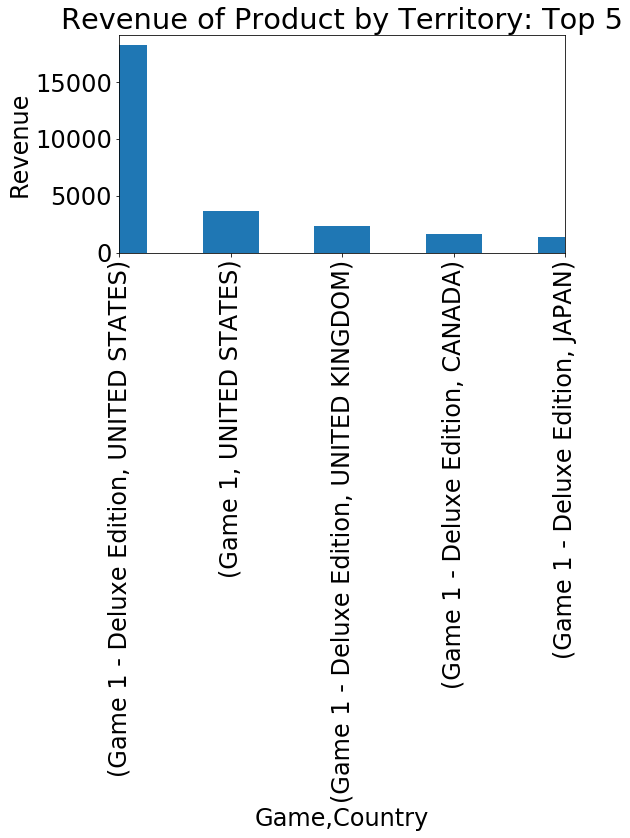

In [16]:
result = table2.sort_values(('Corrected Revenue (Euro)'), ascending=False)

ax = result.plot(kind="bar")
plt.ylabel("Revenue")
plt.title("Revenue of Product by Territory: Top 5")
ax.get_legend().remove()
plt.xlim(0,4)
plt.show()

# Exercise 4.2 Answer

In [11]:
def statistics(column_label):
    # t & f variables
    true = df1[df1['Was_Sale_Day'] == 'Sale Day'][column_label]
    false = df1[df1['Was_Sale_Day'] == 'Not Sale Day'][column_label]
    
    # means
    true_mean = round(true.mean(), 1)
    false_mean = round(false.mean(), 1)
    
    # t-test
    t,p = stats.ttest_ind(true,
                          false, 
                          equal_var = False)
    if p <= 0.05:
        print("SIGNIFICANT!")
        print()
        print("p-value:", "{:.3f}".format(p))
    else:
        print("-Not Significant-")
        print()
        print("p-value:", "{:.3f}".format(p))
    print("Sale Day Mean", column_label, ":", true_mean)
    print("Non-Sale Day Mean", column_label, ":", false_mean)

In [12]:
statistics("Corrected Revenue (Euro)")

-Not Significant-

p-value: 0.058
Sale Day Mean Corrected Revenue (Euro) : 15.6
Non-Sale Day Mean Corrected Revenue (Euro) : 10.5


In [13]:
statistics("Units Sold")

SIGNIFICANT!

p-value: 0.013
Sale Day Mean Units Sold : 2.7
Non-Sale Day Mean Units Sold : 2.0


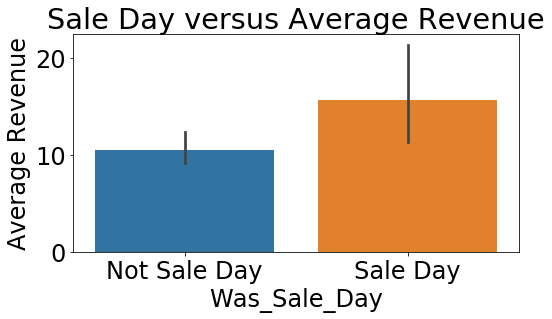

In [14]:
sns.barplot(df1["Was_Sale_Day"], df1["Corrected Revenue (Euro)"])
plt.title("Sale Day versus Average Revenue")
plt.ylabel("Average Revenue")
plt.show()

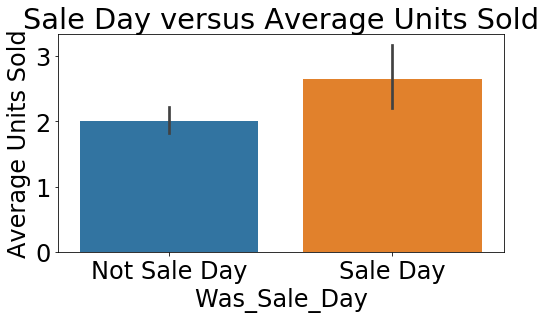

In [15]:
sns.barplot(df1["Was_Sale_Day"], df1["Units Sold"])
plt.title("Sale Day versus Average Units Sold")
plt.ylabel("Average Units Sold")
plt.show()

# Sale days contribute to a higher number of units sold and revenue. 

# However, revenue for sale days not was significantly higher than non-sale days (p > 0.058). In contrast, units sold was significantly higher (p-value < 0.013).